In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
geyser = pd.read_csv("C:\\Users\\sidar\\Documents\\Study Materials\\Assignments\\Kuleshov AML\\faithful.csv")
geyser = geyser.drop("Unnamed: 0", axis=1)

Text(0.5, 1.0, 'Time v. Eruptions')

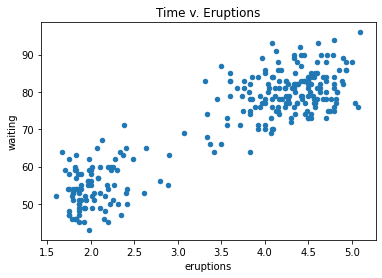

In [3]:
geyser.plot(kind="scatter", x="eruptions", y="waiting")
plt.title("Time v. Eruptions")

In [4]:
geyser = geyser.to_numpy()

In [5]:
#Implementing deprecated mlab function 

def bivariate_normal(X, Y, x_sigma=1.0, y_sigma=1.0, x_mu=0.0, y_mu=0.0, xy_sigma=0.0):

    X_mu = X-x_mu
    Y_mu = Y-y_mu

    rho = xy_sigma/(x_sigma*y_sigma)
    z = X_mu**2/x_sigma**2 + Y_mu**2/y_sigma**2 - 2*rho*X_mu*Y_mu/(x_sigma*y_sigma)
    den = 2*np.pi*x_sigma*y_sigma*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / den

In [6]:
def gmm_loglik(X, mean, cov, mix_coef):
    
    sum2 = 0
    for i in range(X.shape[0]):
        sum1 = 0
        for k in range(mix_coef.shape[0]):
            sum1 += mix_coef[k] * multivariate_normal.pdf(X[i], mean=mean[k], cov=cov[k])
        sum2 += np.log(sum1)
    loglik = sum2
    
    return loglik

In [7]:
def e_step(X, mean, cov, mix_coef):
    
    resp = np.zeros((X.shape[0],mean.shape[0]))
    num = np.zeros(mix_coef.shape[0])
    denomin=0
    for n in range(X.shape[0]):
        den = 0
        for k in range(mix_coef.shape[0]):
            num[k] = mix_coef[k] * multivariate_normal.pdf(X[n,:], mean[k,:],cov[k,:,:])
            den += mix_coef[k] * multivariate_normal.pdf(X[n,:], mean[k,:],cov[k,:,:])
        for k in range(mix_coef.shape[0]):
            resp[n,k] = num[k] / den
            
    return resp

In [8]:
def m_step(X, resp):

    N = np.zeros(resp.shape[1])
    #iterate over clusters
    for k in range(resp.shape[1]):
        #init
        N[k] = resp[:,k].sum(axis=0)
        sum_mean = 0
        sum_cov = 0
        #new means
        for i in range(X.shape[0]):
            sum_mean += resp[i,k] * X[i, :]
        sum_mean /= N[k]
        #new covs
        for i in range(X.shape[0]):
            A = X[i, :] - sum_mean
            sum_cov += resp[i,k] *np.outer(A, A.T)
        mean[k,:] = sum_mean
        cov[k,:,:] = sum_cov / N[k]
    NN = N.sum(axis=0)
    mix_coef = N / NN
    
    return mean, cov, mix_coef

In [9]:
def plot_gmm_2d(norm, resp, mean, cov, mix_coef):
    plt.figure(figsize=[6, 6])
    palette = np.array(sns.color_palette('pastel', n_colors=3))[[0, 2]]
    colors = resp.dot(palette)

    plt.scatter(norm[:, 0], norm[:, 1], c=colors, alpha=0.5)

    for index, m in enumerate(mean):
        mus.append([m[0],m[1]])

In [10]:
norm = np.zeros(geyser.shape)
norm[:,0] = (geyser[:,0] - np.amin(geyser[:,0]))/(np.amax(geyser[:,0]) - np.amin(geyser[:,0]))
norm[:,1] = (geyser[:,1] - np.amin(geyser[:,1]))/(np.amax(geyser[:,1]) - np.amin(geyser[:,1]))

In [14]:
max_iters = 100
mean = np.array([[0.2, 0.6], [0.8, 0.4]])
cov = np.array([0.5 * np.eye(2), 0.5 * np.eye(2)])
mix_coef = np.array([0.5, 0.5])
mus = []

At initialization: log-likelihood = -382.70551524206564


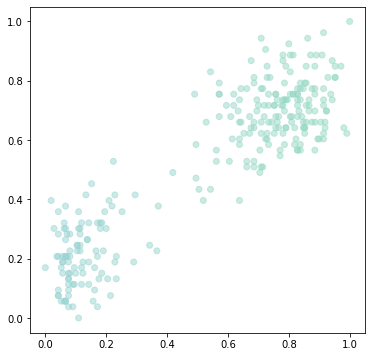

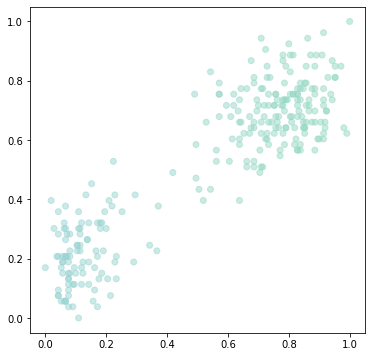

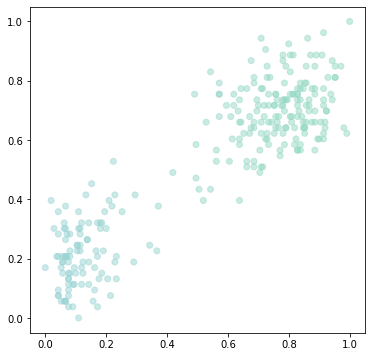

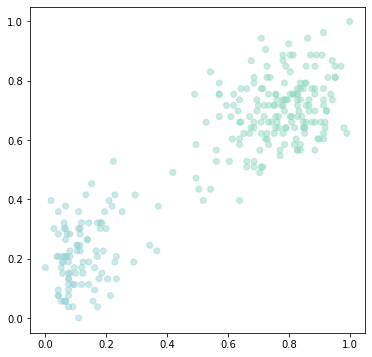

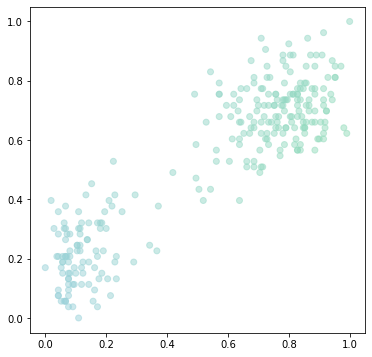

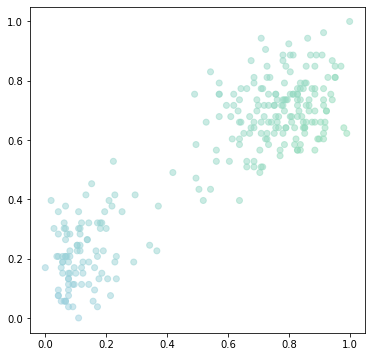

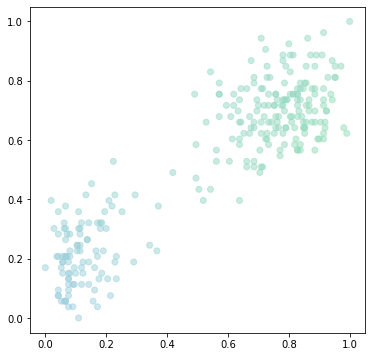

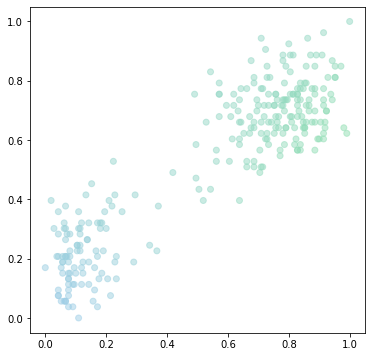

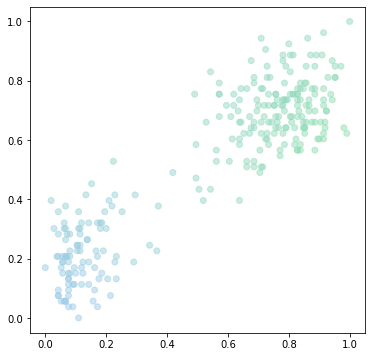

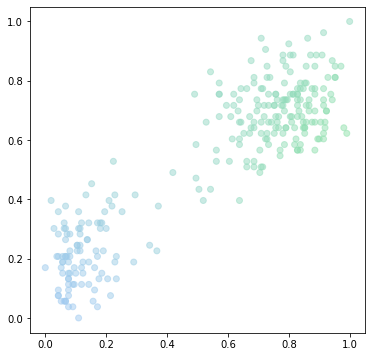

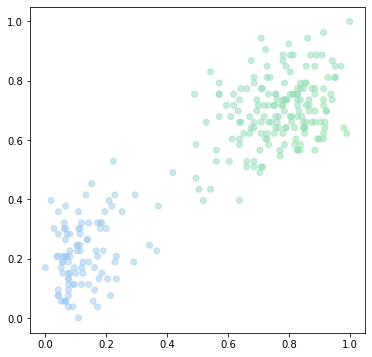

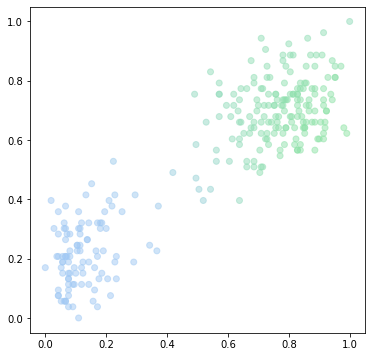

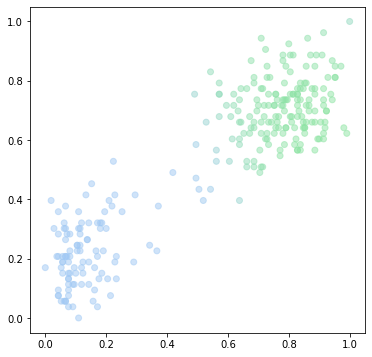

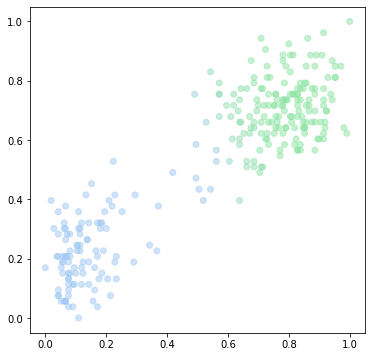

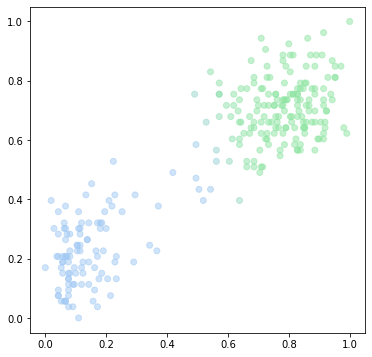

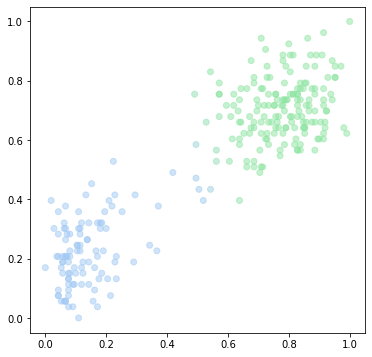

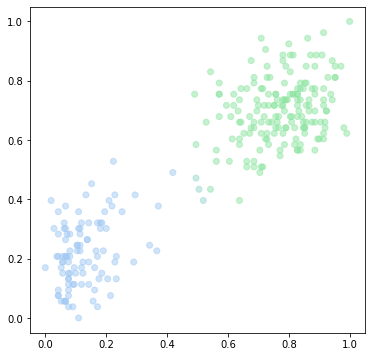

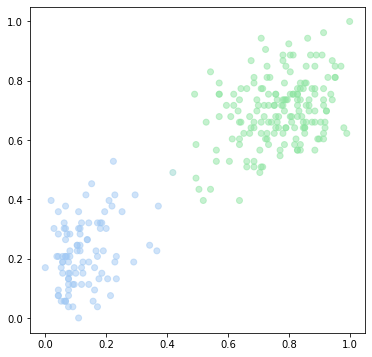

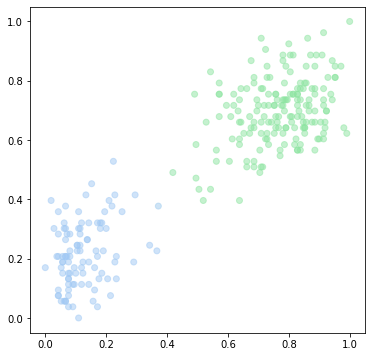

In [15]:
old_loglik = gmm_loglik(norm, mean, cov, mix_coef)
resp = e_step(norm, mean, cov, mix_coef)
print('At initialization: log-likelihood = ' + str(old_loglik))
plot_gmm_2d(norm, resp, mean, cov, mix_coef)

# Perform the EM iteration
for i in range(max_iters):
    resp = e_step(norm, mean, cov, mix_coef)
    mean, cov, mix_coef = m_step(norm, resp)
    new_loglik = gmm_loglik(norm, mean, cov, mix_coef)
    if (new_loglik-old_loglik) < 0.1:
        break
    old_loglik = new_loglik
    plot_gmm_2d(norm, resp, mean, cov, mix_coef)

In [13]:
mus

[[0.2, 0.6],
 [0.8, 0.4],
 [0.4904413329960295, 0.4941470877574137],
 [0.5865309448489864, 0.5574127221230718],
 [0.4850398683627134, 0.48994502972152376],
 [0.5918063830401906, 0.5615093760919231],
 [0.47775657312399794, 0.4843264236688593],
 [0.5989652373848385, 0.5670205198711853],
 [0.4687307002862276, 0.47740469743800734],
 [0.6079109638518467, 0.5738649485998433],
 [0.4575950304175625, 0.46889816143101104],
 [0.6190802398726641, 0.5823749228948586],
 [0.44373276684658886, 0.45834773212327345],
 [0.633224720566115, 0.5931086408124018],
 [0.4261982648051199, 0.4450784855714789],
 [0.6515506817333153, 0.6069337978338625],
 [0.40352330827356786, 0.42810487495106664],
 [0.6759910994931407, 0.6251793742077565],
 [0.37349620891068014, 0.40608959201048855],
 [0.7092277004946084, 0.6495232143542067],
 [0.33359698699862855, 0.3777675031933352],
 [0.7510803502604053, 0.6792441334053066],
 [0.28422672663126564, 0.34252398951419194],
 [0.7810380555915526, 0.7004908340281232],
 [0.239019149789

In [53]:
mu1 = []
mu2 = []

for i in range(0, len(mus)):
    if i%2==0:
        mu1.append(mus[i])
    else:
        mu2.append(mus[i])

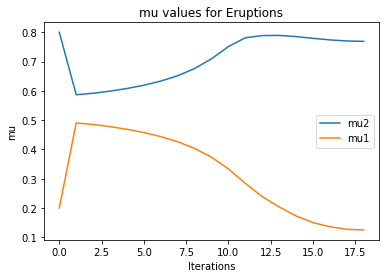

In [56]:
plt.plot([x[0] for x in mu2])
plt.plot([x[0] for x in mu1])
plt.xlabel('Iterations')
plt.ylabel('mu')
plt.legend(['mu2', 'mu1'])
plt.title('mu values for Eruptions')
plt.show()

In [43]:
KM = KMeans(n_clusters = 2).fit(norm)

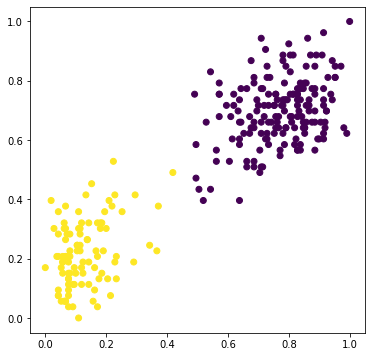

In [44]:
plt.figure(figsize=[6, 6])
plt.scatter(norm[:, 0], norm[:, 1], c=KM.labels_)
plt.show()